### 세계 경제 성장률 EDA
---


#### 데이터 활용 내용

- 연도별 세계 경제 성장률 데이터
- 한국만 사용할 예정
- 연도별 데이터를 일별로 결합시켜 사용.
- 국내총생산, 1인당 GDP, GDP성장률, 소비자물가, 수출, 수입 가격 간 관계 비교 
- ‘소비자물가지수’ 를 변수로 사용하기 위한 추가 자료 조사 필요 



#### 데이터 셋 분석 기간
- 2013.01.01 ~ 2018.12.31

In [56]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from pprint import pprint
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [63]:
# data load
growth_rate = pd.read_csv('./data/05. 세계경제성장률.csv', encoding='cp949')
target_data = pd.read_csv("./data/01. 축산물 실시간 경매시황중계정보.csv", encoding="cp949")

# target data set-up
target_data = target_data[target_data["도매시장명"] == "전국"]
target_data = target_data[target_data["경매 구분 명"] == "경매용+지육상장"]
target_data = target_data[["경매시간", "경매기준시분초", "한우 평균경매 금액"]]
sort_target_data = target_data.sort_values(by=["경매시간", "경매기준시분초"]) # Sort descending by Time
sort_target_data[["경매시간", "경매기준시분초"]] = sort_target_data[["경매시간", "경매기준시분초"]].astype("str")
target_data = sort_target_data
print("===Target DataSet===")
target_data.head()

,경매시간,경매기준시분초,한우 평균경매 금액
34946,20130101,221543,0
34896,20130102,221544,13203
34867,20130103,221545,13743
34811,20130104,221545,13945
34763,20130105,221546,0


In [64]:
print("===World growth rate DataSet===")
growth_rate.head()

===World growth rate DataSet===


,국가별,1990,1990.1,1990.2,1990.3,1990.4,1990.5,1990.6,1990.7,1990.8,...,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9
0,국가별,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),...,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%)
1,세계,-,-,-,3446279,3562626,5327231,-,-,-,...,-,-,-,-,-,7713468,-,-,-,-
2,아시아,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,한국,-,-,-,65016,69844,42869,2.4,40.6,-,...,-,-,-,-,-,51709,-,-,-,-
4,이스라엘,58.9,12645,7.3,11576,16791,4448,12.2,32.5,-,...,-,-,-,-,-,8519,-,-,-,-


### DataSet Preprocessing
---

행렬 변환 후 연도별로 데이터 나열

In [65]:
korea_data = growth_rate[growth_rate["국가별"]=="한국"]
korea_data = korea_data.T.iloc[1:]
korea_data.head()

,3
1990,-
1990.1,-
1990.2,-
1990.3,65016
1990.4,69844


In [103]:
years = [y for y in range(1990, 2020)]
data = []

for i in range(0, len(korea_data), 10):
    data += [list(korea_data[3].iloc[i:i+10])]
for i in range(len(years)):
    data[i] = [years[i]] + data[i] 
    

korea_growth_rate = pd.DataFrame(data, columns=["연도"] + list(growth_rate.iloc[0][1:11]))
korea_growth_rate = korea_growth_rate[korea_growth_rate["연도"] >= 2013].iloc[:-1]
korea_growth_rate.head()

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%)
23,2013,1370.6,27178,3.2,559632,515586,50429,3.1,98.0,66061,84.8
24,2014,1484.0,29242,3.2,572665,525515,50747,3.5,99.3,71543,87.6
25,2015,1465.3,28724,2.8,526757,436499,51015,3.6,100.0,69670,89.9
26,2016,1500.0,29287,2.9,495426,406193,51218,3.7,101.0,68576,92.8
27,2017,1623.3,31605,3.2,573694,478478,51362,3.7,102.9,71030,95.1


### Korea Economic Growth Rate EDA
---

In [104]:
print(f"Korea Economic Growth Rate Data Shape : {korea_growth_rate.shape}")
korea_growth_rate

Korea Economic Growth Rate Data Shape : (6, 11)


,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%)
23,2013,1370.6,27178,3.2,559632,515586,50429,3.1,98.0,66061,84.8
24,2014,1484.0,29242,3.2,572665,525515,50747,3.5,99.3,71543,87.6
25,2015,1465.3,28724,2.8,526757,436499,51015,3.6,100.0,69670,89.9
26,2016,1500.0,29287,2.9,495426,406193,51218,3.7,101.0,68576,92.8
27,2017,1623.3,31605,3.2,573694,478478,51362,3.7,102.9,71030,95.1
28,2018,1720.9,33346,2.7,604860,535202,51607,3.8,104.5,-,95.9


##### 2019 년 조강생산량 평균값으로 대치

In [105]:
korea_growth_rate["조강생산량 (1000M/T)"].iloc[-1] = sum([int(v) for v in korea_growth_rate["조강생산량 (1000M/T)"][:-1]]) / 5
korea_growth_rate

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%)
23,2013,1370.6,27178,3.2,559632,515586,50429,3.1,98.0,66061,84.8
24,2014,1484.0,29242,3.2,572665,525515,50747,3.5,99.3,71543,87.6
25,2015,1465.3,28724,2.8,526757,436499,51015,3.6,100.0,69670,89.9
26,2016,1500.0,29287,2.9,495426,406193,51218,3.7,101.0,68576,92.8
27,2017,1623.3,31605,3.2,573694,478478,51362,3.7,102.9,71030,95.1
28,2018,1720.9,33346,2.7,604860,535202,51607,3.8,104.5,69376,95.9


In [106]:
korea_growth_rate.dtypes

연도                              int64
국내총생산(GDP)(당해년 가격) (10억US$)    object
1인당 GDP(당해년 가격) (달러)           object
GDP 성장률 (%)                    object
수출 (100만달러)                    object
수입 (100만달러)                    object
총인구 (천명)                       object
실업률 (%)                        object
소비자물가지수 (2010=100)             object
조강생산량 (1000M/T)                object
인터넷 이용률 (%)                    object
dtype: object

In [107]:
korea_growth_rate = korea_growth_rate.astype("float")

In [108]:
print(f"Korea Economic Growth Rate statistics summary")
korea_growth_rate.describe()

Korea Economic Growth Rate statistics summary


,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%)
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,2015.500000,1527.350000,29897.000000,3.000000,555505.666667,482912.166667,51063.000000,3.566667,100.95000,69376.000000,91.016667
std,1.870829,124.672383,2208.297081,0.228035,38766.447393,52300.060938,427.429058,0.250333,2.39729,1956.898873,4.365051
min,2013.000000,1370.600000,27178.000000,2.700000,495426.000000,406193.000000,50429.000000,3.100000,98.00000,66061.000000,84.800000
25%,2014.250000,1469.975000,28853.500000,2.825000,534975.750000,446993.750000,50814.000000,3.525000,99.47500,68776.000000,88.175000
50%,2015.500000,1492.000000,29264.500000,3.050000,566148.500000,497032.000000,51116.500000,3.650000,100.50000,69523.000000,91.350000
75%,2016.750000,1592.475000,31025.500000,3.200000,573436.750000,523032.750000,51326.000000,3.700000,102.42500,70690.000000,94.525000
max,2018.000000,1720.900000,33346.000000,3.200000,604860.000000,535202.000000,51607.000000,3.800000,104.50000,71543.000000,95.900000


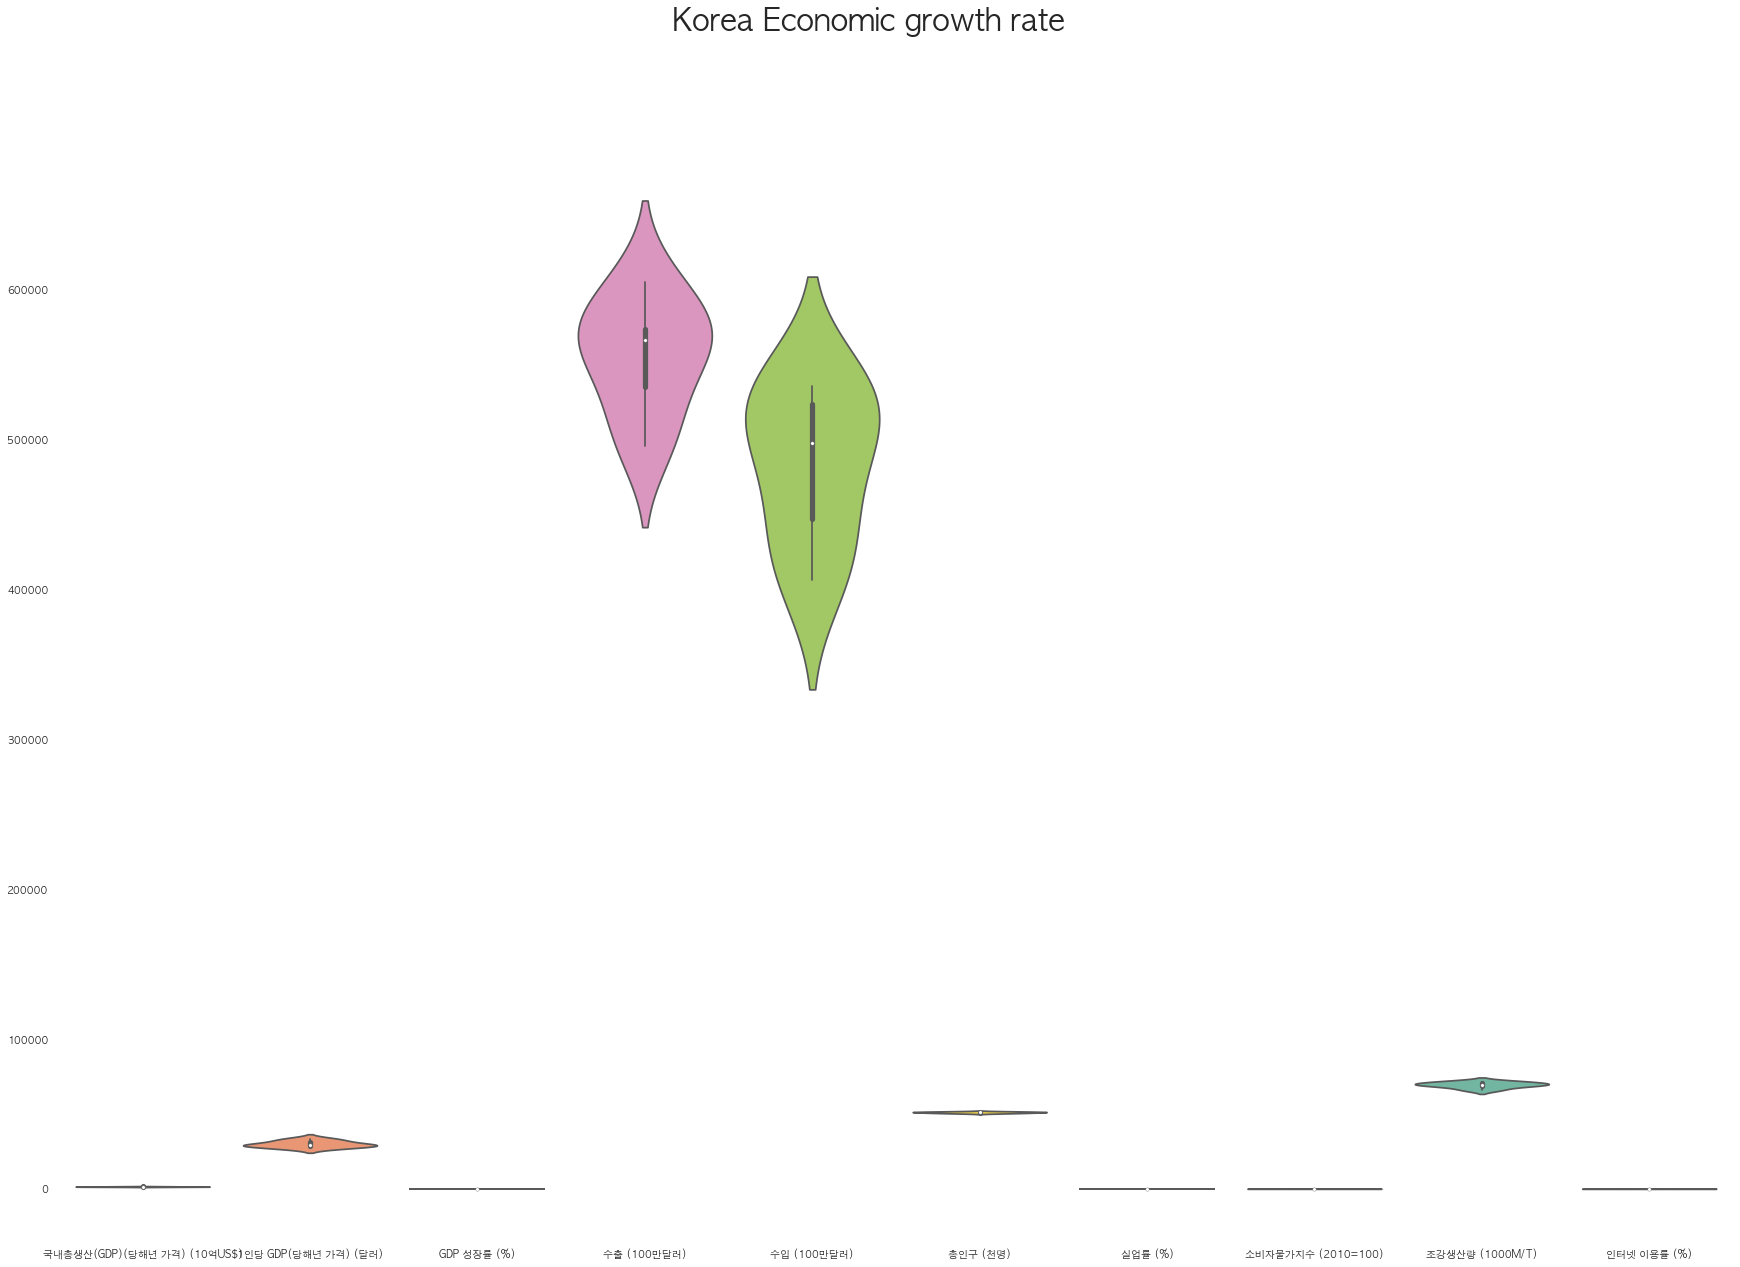

In [112]:
data = korea_growth_rate.drop("연도", axis=1)
plt.figure(figsize=(30,20))
plt.suptitle("Korea Economic growth rate", fontsize=30)
ax = sns.violinplot(data=data, scale="width", palette="Set2")

데이터가 적어서 굳이 의미 없을 듯 바로 상관성 분석

### 상관성 분석
---

상관성 분석을 위한 데이터 결합

In [116]:
# create annual feature in target data
target_data["연도"] = target_data["경매시간"].apply(lambda x : int(x[:4]))
target_data.head()

,경매시간,경매기준시분초,한우 평균경매 금액,연도
34946,20130101,221543,0,2013
34896,20130102,221544,13203,2013
34867,20130103,221545,13743,2013
34811,20130104,221545,13945,2013
34763,20130105,221546,0,2013


In [120]:
merge_df = pd.merge(korea_growth_rate, target_data, on="연도", how="right")
merge_df.head()

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%),경매시간,경매기준시분초,한우 평균경매 금액
0,2013.0,1370.6,27178.0,3.2,559632.0,515586.0,50429.0,3.1,98.0,66061.0,84.8,20130101,221543,0
1,2013.0,1370.6,27178.0,3.2,559632.0,515586.0,50429.0,3.1,98.0,66061.0,84.8,20130102,221544,13203
2,2013.0,1370.6,27178.0,3.2,559632.0,515586.0,50429.0,3.1,98.0,66061.0,84.8,20130103,221545,13743
3,2013.0,1370.6,27178.0,3.2,559632.0,515586.0,50429.0,3.1,98.0,66061.0,84.8,20130104,221545,13945
4,2013.0,1370.6,27178.0,3.2,559632.0,515586.0,50429.0,3.1,98.0,66061.0,84.8,20130105,221546,0


In [121]:
corr_data = merge_df.drop("연도", axis=1)
corr = merge_df.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,연도,국내총생산(GDP)(당해년 가격) (10억US$),1인당 GDP(당해년 가격) (달러),GDP 성장률 (%),수출 (100만달러),수입 (100만달러),총인구 (천명),실업률 (%),소비자물가지수 (2010=100),조강생산량 (1000M/T),인터넷 이용률 (%),한우 평균경매 금액
연도,1.00,0.93,0.91,-0.75,0.02,-0.36,0.99,0.87,0.99,0.41,0.99,0.11
국내총생산(GDP)(당해년 가격) (10억US$),0.93,1.00,1.00,-0.56,0.33,-0.04,0.93,0.88,0.96,0.61,0.92,0.13
1인당 GDP(당해년 가격) (달러),0.91,1.00,1.00,-0.53,0.37,-0.00,0.91,0.87,0.95,0.62,0.90,0.13
GDP 성장률 (%),-0.75,-0.56,-0.53,1.00,0.30,0.57,-0.76,-0.63,-0.69,-0.07,-0.72,-0.06
수출 (100만달러),0.02,0.33,0.37,0.30,1.00,0.91,-0.03,-0.05,0.16,0.23,-0.04,0.05
수입 (100만달러),-0.36,-0.04,-0.00,0.57,0.91,1.00,-0.41,-0.38,-0.23,0.05,-0.42,-0.01
총인구 (천명),0.99,0.93,0.91,-0.76,-0.03,-0.41,1.00,0.93,0.97,0.49,0.99,0.12
실업률 (%),0.87,0.88,0.87,-0.63,-0.05,-0.38,0.93,1.00,0.85,0.76,0.90,0.12
소비자물가지수 (2010=100),0.99,0.96,0.95,-0.69,0.16,-0.23,0.97,0.85,1.00,0.43,0.97,0.12
조강생산량 (1000M/T),0.41,0.61,0.62,-0.07,0.23,0.05,0.49,0.76,0.43,1.00,0.46,0.09


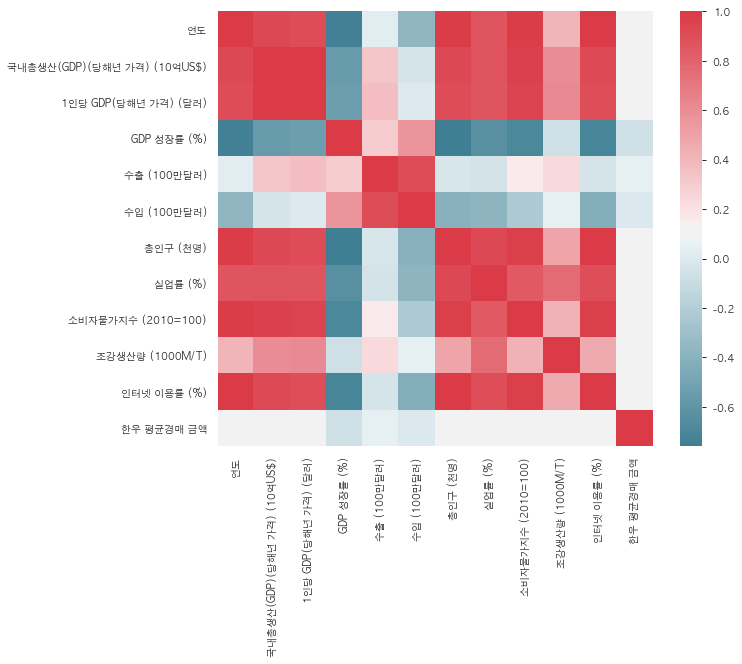

In [122]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [136]:
ix = merge_df.corr().sort_values('한우 평균경매 금액', ascending=False).index
positive_features = list(ix[1:-2])
negative_features = list(ix[-2:])

print("===Positive Correlation Features====\n")
pprint(positive_features[:])
print()
print("===Negative Correlation Features====\n")
pprint(negative_features)

===Positive Correlation Features====

['1인당 GDP(당해년 가격) (달러)',
 '국내총생산(GDP)(당해년 가격) (10억US$)',
 '소비자물가지수 (2010=100)',
 '총인구 (천명)',
 '실업률 (%)',
 '연도',
 '인터넷 이용률 (%)',
 '조강생산량 (1000M/T)',
 '수출 (100만달러)']

===Negative Correlation Features====

['수입 (100만달러)', 'GDP 성장률 (%)']


#### 결과해석
---

- correlation 값이 작지만 예상대로 수입량과 음의 상관관계를 가지고 있고, 양의 상관관계중 가장 큰 변수로 1인당 GDP, 국내 총 GDP 순으로 이어짐
- 실제 분석전 예상한 결과 값이 나오긴 했으나 상관계수 값이 미미함.


y와 음의 상관관계를 가지는 변수
- '수입 (100만달러)', 'GDP 성장률 (%)'

y와 양의 상관관계를 가지는 변수
- '1인당 GDP(당해년 가격) (달러)', '국내총생산(GDP)(당해년 가격) (10억US$)',
       '소비자물가지수 (2010=100)', '총인구 (천명)', '실업률 (%)', '연도', '인터넷 이용률 (%)',
       '조강생산량 (1000M/T)', '수출 (100만달러)'